# P/E ratio and Stock Market return

This project's goal is to show the close relationship between P/E ratios in a given year and the return in the next 10 years from that given year.
This data set consists of monthly stock price, dividends, and earnings data and the consumer price index (to allow conversion to real values), all starting January 1871.

I am using a Data set from Robert J. Shiller. http://www.econ.yale.edu/~shiller/data.htm.

Emanuele Corà

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("ie_data.xls", sheet_name="Data", encoding="utf-8")

In [3]:
df.columns = ["Date", "Price", "Dividends", "Earnings", "CPI", "Date Fraction", "Long Interest Rate GS10", 
              "Real price", "Real Dividend", "Real Total Return Price", "Real Earnings", "Real TR Scaled Earnings", 
             "CAPE ratio", "NAN1", "TR CAPE ratio", "NAN2"]

In [4]:
df.drop(range(7), inplace=True)

In [5]:
df.drop(columns=["NAN1", "NAN2"], inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df["P/E ratio"] = df["Price"] / df["Earnings"]

In [8]:
df['Date'] = df['Date'].astype(str)

In [9]:
df["len"] = df["Date"].apply(len)
df["Date"] = df["Date"].where(df["len"] == 7, df["Date"] + "0")

In [10]:
df.drop(columns="len", inplace=True)

In [11]:
print(df.shape)
df.head()

(1674, 15)


,Date,Price,Dividends,Earnings,CPI,Date Fraction,Long Interest Rate GS10,Real price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,CAPE ratio,TR CAPE ratio,P/E ratio
127,1881.01,6.19,0.265,0.4858,9.41942,1881.04,3.7,170.697,7.30773,315.799,13.3966,24.7843,18.474,24.1351,12.7419
128,1881.02,6.17,0.27,0.4817,9.51459,1881.12,3.69333,168.444,7.37114,312.766,13.1507,24.4181,18.1473,23.6555,12.8088
129,1881.03,6.24,0.275,0.4775,9.51459,1881.21,3.68667,170.355,7.50764,317.476,13.036,24.2941,18.2701,23.7677,13.0681
130,1881.04,6.22,0.28,0.4733,9.60967,1881.29,3.68,168.129,7.56851,314.503,12.7935,23.9315,17.9501,23.3089,13.1418
131,1881.05,6.5,0.285,0.4692,9.51459,1881.37,3.67333,177.453,7.78064,333.158,12.8094,24.0489,18.8697,24.4567,13.8534


In [12]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y.%m')
df = df.set_index("Date")

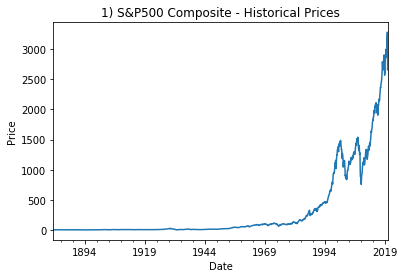

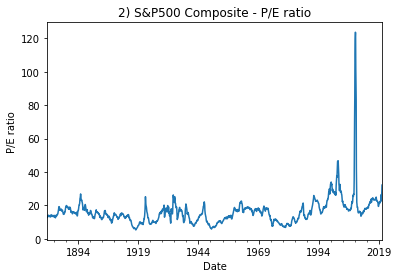

The average P/E ratio for stocks in the S&P500 has been:  16.123217668551018
The average P/E ratio (1881-1990):  15.428448210640067
The average P/E ratio (1990-2020):  24.303523743626197


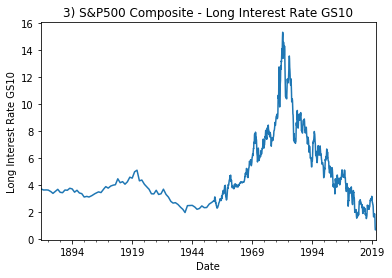

The highest level in Long Interest Rates GS10 is  15.32  in  [datetime.date(1981, 9, 1)]


In [67]:
df["Price"].plot()
plt.title("1) S&P500 Composite - Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
df["P/E ratio"].plot()
plt.title("2) S&P500 Composite - P/E ratio")
plt.xlabel("Date")
plt.ylabel("P/E ratio")
plt.show()
print("The average P/E ratio for stocks in the S&P500 has been: ", pe_avg)
print("The average P/E ratio (1881-1990): ", df["P/E ratio"].head(366).mean())
print("The average P/E ratio (1990-2020): ", df["P/E ratio"].tail(366).mean())
df["Long Interest Rate GS10"].plot()
plt.title("3) S&P500 Composite - Long Interest Rate GS10")
plt.xlabel("Date")
plt.ylabel("Long Interest Rate GS10")
plt.show()
pe_avg = df["P/E ratio"].mean()
print("The highest level in Long Interest Rates GS10 is ", df["Long Interest Rate GS10"].max(), " in " , df.index.date[df["Long Interest Rate GS10"] == df["Long Interest Rate GS10"].max()]) 

The image 1) shows the historical S&P500 Composite's prices since 1881. We can see in the last 30 years there were 3 bull markets and 2 market crashes during the dot-com bubble in early 2000s and the financial crisis in 2008.

The second image shows P/E ratio of the S&P500 in the same time period. The P/E ratio is equal to the price divided by the TTM (trailing-twelve-months) earnings and can be used by investors to understand whether a stock or the entire market is or is not overvalued.
For example, a above average S&P500, P/E ratio may indicate that the market is overvalued. Instead, when P/E ratio is below average, the market might be undervalued. 
We cannot consider P/E ratio as an absolute metric because the market is influenced heavily by other factors. If we had considered P/E ratio as an absolute metric, the markets (based on a P/E ratio valuation) would have been undervalued during only 33 months during the last 30 years.
Interest rates can help us understand the reason why P/E ratio in the last 30 years has been usually higher than the previous P/E ratios (The average P/E ratio from 1881 to 1990 has been 15.4 while from 1990 to 2020 has been 24.3).
Interest rates peaked in 1981 and had been decreasing steadily until 2020 when they hit almost 0. But, what does interest rates mean for stocks? 
When the interest are lower, future cash flow are discounted with a lower discount rate that makes future cash flows more valuable. In 2020 we have interest rates near to 0, which means that the risk-free rate (10 year treasury bond's yield) is almost 0 and the discount rate is only the market premium you get from a stock.


In [36]:
print("When the S&P500 P/E was below average")
tail = df.copy().tail(350)
tail[tail["P/E ratio"] < pe_avg]

When the S&P500 P/E was below average


,Price,Dividends,Earnings,CPI,Date Fraction,Long Interest Rate GS10,Real price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,CAPE ratio,TR CAPE ratio,P/E ratio
Date,,,,,,,,,,,,,,
1994-11-01,461.01,13.0967,29.51,149.7,1994.87,7.96,799.925,22.7248,309541,51.2045,19814.2,20.2095,23.5138,15.6222
1994-12-01,455.19,13.17,30.6,149.7,1994.96,7.81,789.826,22.852,306370,53.0958,20595.6,19.9115,23.1501,14.8755
1995-01-01,465.25,13.18,31.25,150.3,1995.04,7.78,804.059,22.7781,312627,54.0072,20998.6,20.2191,23.4884,14.888
1995-02-01,481.92,13.18,31.9,150.9,1995.12,7.47,829.557,22.6875,323276,54.9113,21398.8,20.8026,24.1443,15.1072
1995-03-01,493.15,13.17,32.55,151.4,1995.21,7.2,846.084,22.5954,330450,55.8452,21811.1,21.1527,24.5273,15.1505
1995-04-01,507.91,13.2433,33.1767,151.9,1995.29,7.06,868.539,22.6464,339958,56.733,22206,21.6427,25.0704,15.3092
1995-05-01,523.81,13.3067,33.8033,152.2,1995.37,6.63,893.963,22.71,350650,57.6906,22628.7,22.1954,25.6842,15.4958
1995-06-01,539.35,13.36,34.43,152.5,1995.46,6.17,918.674,22.7561,361086,58.6446,23050.3,22.7184,26.2615,15.6651
1995-07-01,557.37,13.44,34.68,152.5,1995.54,6.28,949.367,22.8923,373900,59.0704,23264.3,23.3764,26.9928,16.0718


Date
1990-01-01    15.1165
1990-02-01     14.966
1990-03-01    15.6188
1990-04-01     15.705
1990-05-01    16.3693
               ...   
2020-02-01    26.4207
2020-03-01    22.8006
2020-04-01    25.0899
2020-05-01    28.3174
2020-06-01     32.176
Name: P/E ratio, Length: 366, dtype: object

In [ ]:
df["CAPE ratio"].plot()
plt.title("3) S&P500 Composite - CAPE ratio")
plt.xlabel("Date")
plt.ylabel("CAPE ratio")
plt.show()